In [1]:
import pandas as pd
import numpy  as np
import operator

import matplotlib.pyplot as plt
import itertools    
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import PCA

In [28]:
path_away='../data/Train_Data/train_away_team_statistics_df.csv'
path_home='../data/Train_Data/train_home_team_statistics_df.csv'

df_away=pd.read_csv(path_away).drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home=pd.read_csv(path_home).drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home.columns ]


In [29]:
df_player_away = pd.read_csv(path_away.replace('team','player'))

In [30]:
df_player_away.columns = [('HOME_' + str(col)) if col != 'ID' else 'ID' for col in df_player_away.columns]

df_player_away_agg=df_player_away.groupby('ID', as_index=False).sum()


In [31]:
df_joined=df_away.join(df_home.set_index('ID'), on='ID')


In [32]:
df_joined.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [33]:
df_joined = df_joined.join(df_player_away_agg.set_index('ID'), on='ID')

In [34]:
df_joined.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_PLAYER_STARTING_LINEUP_5_last_match_std,HOME_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,HOME_PLAYER_TACKLES_5_last_match_std,HOME_PLAYER_TOTAL_CROSSES_5_last_match_std,HOME_PLAYER_TOTAL_DUELS_5_last_match_std,HOME_PLAYER_YELLOWCARDS_5_last_match_std,HOME_PLAYER_PUNCHES_5_last_match_std,HOME_PLAYER_LONG_BALLS_5_last_match_std,HOME_PLAYER_LONG_BALLS_WON_5_last_match_std,HOME_PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,427.0,404.0,417.0,271.0,552.0,672.0,0.0,0.0,0.0,0.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,910.0,211.0,439.0,271.0,582.0,525.0,0.0,0.0,0.0,0.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,556.0,411.0,654.0,235.0,738.0,826.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,266.0,382.0,368.0,156.0,486.0,329.0,0.0,0.0,0.0,0.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,483.0,165.0,343.0,197.0,408.0,385.0,0.0,0.0,0.0,0.0


In [9]:
df_home=df_home.set_index('ID')

In [10]:
df_home.head()

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,0.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [ ]:
df_joined

In [125]:
df_joined=df_away.join(df_home.set_index('ID'), on='ID')
df_joined=df_joined.fillna(0.0)
df_final=df_joined.sort_values(by=['ID'])


In [126]:
df_joined.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [127]:
df_result=pd.read_csv('./data/Train_Data/Y_train.csv')


In [128]:
df_result.head()

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


In [129]:
df_result.loc[df_result['DRAW'] == 1, 'result'] = 0
df_result.loc[df_result['AWAY_WINS'] == 1 , 'result'] = -1
df_result.loc[df_result['HOME_WINS'] == 1 , 'result'] = 1
df_result['result'] = df_result['result'].astype('int')


In [130]:
df_result_final=df_result.sort_values(by=['ID']).iloc[:,[4]]

In [131]:
df_result_final.head()

,result
0,-1
1,0
2,-1
3,1
4,0


In [132]:
df_final

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,6.0,6.0,5.0,7.0,7.0,4.0,3.0,4.0,8.0,...,4.0,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0
12299,12299,3.0,2.0,6.0,1.0,3.0,4.0,4.0,7.0,0.0,...,6.0,10.0,7.0,2.0,0.0,0.0,3.0,10.0,6.0,1.0
12300,12300,7.0,7.0,6.0,7.0,3.0,3.0,2.0,4.0,4.0,...,7.0,8.0,0.0,7.0,0.0,0.0,3.0,1.0,3.0,2.0
12301,12301,1.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,6.0,...,10.0,10.0,0.0,6.0,8.0,3.0,0.0,3.0,0.0,5.0


In [133]:
df_final=df_final.drop(["ID"],axis=1)


In [134]:

attribut_train,attribut_test,result_train,result_test=train_test_split(df_final, df_result_final, test_size=0.1,random_state=10)


In [135]:
attribut_train

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
9267,6.0,8.0,6.0,6.0,5.0,6.0,5.0,0.0,8.0,5.0,...,3.0,0.0,10.0,0.0,3.0,8.0,4.0,3.0,0.0,2.0
10281,9.0,10.0,8.0,10.0,5.0,7.0,6.0,6.0,8.0,7.0,...,5.0,0.0,5.0,5.0,10.0,0.0,6.0,6.0,2.0,3.0
1044,4.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,6.0,10.0,...,2.0,0.0,0.0,1.0,8.0,3.0,1.0,7.0,7.0,2.0
3914,4.0,5.0,3.0,6.0,3.0,3.0,3.0,8.0,7.0,4.0,...,3.0,0.0,6.0,2.0,3.0,6.0,4.0,0.0,4.0,5.0
11168,5.0,6.0,2.0,5.0,2.0,5.0,5.0,6.0,8.0,7.0,...,4.0,0.0,10.0,2.0,9.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2.0,2.0,3.0,0.0,4.0,2.0,2.0,4.0,2.0,4.0,...,1.0,8.0,1.0,6.0,9.0,0.0,3.0,3.0,4.0,2.0
11633,8.0,7.0,3.0,10.0,10.0,10.0,10.0,1.0,7.0,0.0,...,2.0,0.0,6.0,2.0,0.0,0.0,6.0,0.0,3.0,0.0
1344,6.0,7.0,5.0,5.0,4.0,6.0,6.0,10.0,5.0,3.0,...,5.0,0.0,4.0,2.0,5.0,0.0,0.0,3.0,0.0,2.0
7293,4.0,4.0,4.0,4.0,5.0,2.0,2.0,6.0,7.0,4.0,...,5.0,10.0,7.0,7.0,5.0,5.0,0.0,10.0,0.0,8.0


In [136]:
result_train

,result
9267,-1
10281,-1
1044,1
3914,1
11168,0
...,...
7291,0
11633,0
1344,1
7293,-1


In [137]:
attribut_train

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
9267,6.0,8.0,6.0,6.0,5.0,6.0,5.0,0.0,8.0,5.0,...,3.0,0.0,10.0,0.0,3.0,8.0,4.0,3.0,0.0,2.0
10281,9.0,10.0,8.0,10.0,5.0,7.0,6.0,6.0,8.0,7.0,...,5.0,0.0,5.0,5.0,10.0,0.0,6.0,6.0,2.0,3.0
1044,4.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,6.0,10.0,...,2.0,0.0,0.0,1.0,8.0,3.0,1.0,7.0,7.0,2.0
3914,4.0,5.0,3.0,6.0,3.0,3.0,3.0,8.0,7.0,4.0,...,3.0,0.0,6.0,2.0,3.0,6.0,4.0,0.0,4.0,5.0
11168,5.0,6.0,2.0,5.0,2.0,5.0,5.0,6.0,8.0,7.0,...,4.0,0.0,10.0,2.0,9.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2.0,2.0,3.0,0.0,4.0,2.0,2.0,4.0,2.0,4.0,...,1.0,8.0,1.0,6.0,9.0,0.0,3.0,3.0,4.0,2.0
11633,8.0,7.0,3.0,10.0,10.0,10.0,10.0,1.0,7.0,0.0,...,2.0,0.0,6.0,2.0,0.0,0.0,6.0,0.0,3.0,0.0
1344,6.0,7.0,5.0,5.0,4.0,6.0,6.0,10.0,5.0,3.0,...,5.0,0.0,4.0,2.0,5.0,0.0,0.0,3.0,0.0,2.0
7293,4.0,4.0,4.0,4.0,5.0,2.0,2.0,6.0,7.0,4.0,...,5.0,10.0,7.0,7.0,5.0,5.0,0.0,10.0,0.0,8.0


In [138]:
n_components = 10
kpca= KernelPCA(n_components=n_components,kernel = 'poly')
kpca.fit_transform(attribut_train)

attribut_train_reduced = pd.DataFrame(kpca.transform(attribut_train), index=attribut_train.index, columns=["KPC" + str(i) for i in range(1, n_components + 1)])
attribut_test_reduced = pd.DataFrame(kpca.transform(attribut_test), index=attribut_test.index, columns=["KPC" + str(i) for i in range(1, n_components + 1)])

In [139]:
from sklearn.linear_model import LogisticRegression
max_iter_list=[300,3_000,30_000,300_000,3_000_000,30_000_000]
solver_list=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
regularization_factor_list=[0.1,0.01,0.001,0.0001]
accuracy_dict={}
LR_dict={}
for max_iter in max_iter_list:
    for solver in solver_list:
        for regularization_factor in regularization_factor_list:
            LR = LogisticRegression(max_iter=max_iter,solver=solver,C=regularization_factor).fit(attribut_train_reduced, result_train)
            yhat = LR.predict(attribut_test_reduced)
            accuracy=np.round(accuracy_score(result_test,yhat),4)
            key=f'solver_{solver}_iter_{max_iter}_C_{regularization_factor}'
            accuracy_dict[key]=accuracy
            LR_dict[key]=LR
                        


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

In [140]:
accuracy_dict

{'solver_lbfgs_iter_300_C_0.1': 0.4882,
 'solver_lbfgs_iter_300_C_0.01': 0.4882,
 'solver_lbfgs_iter_300_C_0.001': 0.4882,
 'solver_lbfgs_iter_300_C_0.0001': 0.4882,
 'solver_liblinear_iter_300_C_0.1': 0.4874,
 'solver_liblinear_iter_300_C_0.01': 0.489,
 'solver_liblinear_iter_300_C_0.001': 0.4858,
 'solver_liblinear_iter_300_C_0.0001': 0.4671,
 'solver_newton-cg_iter_300_C_0.1': 0.489,
 'solver_newton-cg_iter_300_C_0.01': 0.489,
 'solver_newton-cg_iter_300_C_0.001': 0.489,
 'solver_newton-cg_iter_300_C_0.0001': 0.4882,
 'solver_newton-cholesky_iter_300_C_0.1': 0.4874,
 'solver_newton-cholesky_iter_300_C_0.01': 0.4874,
 'solver_newton-cholesky_iter_300_C_0.001': 0.4874,
 'solver_newton-cholesky_iter_300_C_0.0001': 0.4882,
 'solver_sag_iter_300_C_0.1': 0.489,
 'solver_sag_iter_300_C_0.01': 0.489,
 'solver_sag_iter_300_C_0.001': 0.489,
 'solver_sag_iter_300_C_0.0001': 0.4882,
 'solver_saga_iter_300_C_0.1': 0.4882,
 'solver_saga_iter_300_C_0.01': 0.489,
 'solver_saga_iter_300_C_0.001': 0.

In [141]:
max_accuracy=max(accuracy_dict.items(), key=operator.itemgetter(1))
LR_best=LR_dict[max_accuracy[0]]

In [142]:
max_accuracy

('solver_liblinear_iter_300_C_0.01', 0.489)

In [143]:
yhat = LR_best.predict(attribut_test_reduced)
np.round(accuracy_score(result_test,yhat),4)

0.489

In [144]:
attribut_test_reduced

,KPC1,KPC2,KPC3,KPC4,KPC5,KPC6,KPC7,KPC8,KPC9,KPC10
11028,-22.197639,15.276455,-21.167011,-41.610046,-2.276072,0.661973,-9.800080,11.224575,-6.866642,19.634322
10284,4.234387,3.280565,-25.148035,-9.529096,7.828580,8.971042,-0.020561,-10.050633,14.527296,-2.458885
10177,-28.878276,-1.505344,-4.962036,-15.183047,-2.171349,-11.758933,-7.007255,-7.238081,-7.639119,-9.072323
7139,22.952163,-16.823053,29.949168,8.675959,-21.654242,10.432795,-12.392002,6.296593,11.916403,-32.698555
937,-21.788410,-30.810389,-7.383370,2.811121,-5.064697,2.231145,16.872505,-13.746380,19.281366,5.501415
...,...,...,...,...,...,...,...,...,...,...
10569,45.878001,-77.729112,15.507082,-16.118758,14.462221,-0.680541,-12.215756,-14.055047,-15.321980,-1.313021
10359,-29.628329,-13.704412,11.905846,-2.437280,-2.765304,-7.976224,-4.847787,-7.446895,-9.292263,4.271527
745,4.680775,-34.948744,-19.176780,15.539651,0.334325,22.752605,-12.041921,-1.430976,-7.271837,1.052186
10906,-0.363489,-6.896314,-38.489842,19.187041,-6.298319,5.941391,9.165093,8.148324,19.209796,3.799031


In [145]:
result_test

,result
11028,1
10284,-1
10177,1
7139,1
937,-1
...,...
10569,1
10359,1
745,-1
10906,0


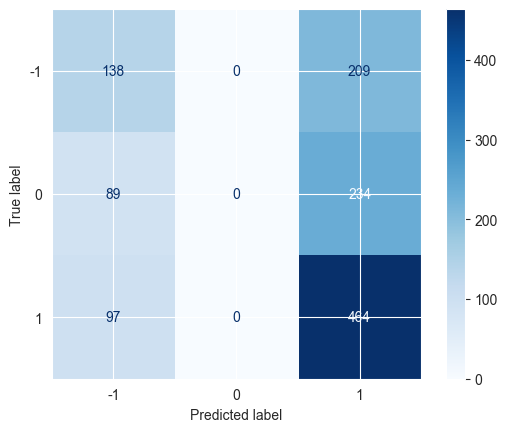

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1, 0, 1],)
disp.plot(cmap="Blues")

In [147]:
df_away_test=pd.read_csv('./data/Test_Data/test_away_team_statistics_df.csv')
df_home_test=pd.read_csv('./data/Test_Data/test_home_team_statistics_df.csv')
df_home_test.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home_test.columns ]


In [148]:
df_joined_test=df_away_test.join(df_home_test.set_index('ID'), on='ID')
df_joined_test=df_joined_test.fillna(0.0)
df_final_test=df_joined_test.sort_values(by=['ID'])
df_final_test.index=df_final_test['ID']
df_final_test=df_final_test.drop(['ID'],axis=1)

In [149]:
df_final_test

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
12303,6.0,6.0,5.0,7.0,7.0,4.0,3.0,6.0,3.0,7.0,...,2.0,9.0,0.0,10.0,0.0,4.0,4.0,6.0,2.0,3.0
12304,4.0,4.0,4.0,4.0,3.0,8.0,8.0,4.0,7.0,3.0,...,9.0,10.0,3.0,1.0,8.0,3.0,8.0,1.0,0.0,2.0
12305,1.0,1.0,2.0,2.0,2.0,6.0,5.0,4.0,2.0,2.0,...,6.0,8.0,2.0,9.0,0.0,6.0,0.0,9.0,0.0,0.0
12306,6.0,9.0,6.0,9.0,4.0,4.0,4.0,1.0,10.0,6.0,...,4.0,5.0,2.0,3.0,8.0,0.0,2.0,2.0,2.0,3.0
12307,5.0,5.0,2.0,4.0,4.0,1.0,2.0,3.0,8.0,2.0,...,5.0,0.0,0.0,7.0,5.0,0.0,1.0,6.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37666,8.0,8.0,6.0,10.0,7.0,8.0,8.0,10.0,3.0,5.0,...,2.0,6.0,2.0,1.0,5.0,6.0,6.0,5.0,2.0,0.0
37667,7.0,4.0,4.0,9.0,8.0,7.0,6.0,3.0,9.0,3.0,...,3.0,0.0,2.0,8.0,0.0,0.0,4.0,8.0,10.0,10.0
37668,3.0,4.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,5.0,...,7.0,0.0,8.0,4.0,0.0,7.0,0.0,2.0,0.0,3.0


In [150]:
df_final_test_reduced = pd.DataFrame(kpca.transform(df_final_test), index=df_final_test.index, columns=["KPC" + str(i) for i in range(1, n_components + 1)])


In [151]:
df_final_test_reduced

,KPC1,KPC2,KPC3,KPC4,KPC5,KPC6,KPC7,KPC8,KPC9,KPC10
ID,,,,,,,,,,
12303,3.481418,5.392863,-47.240766,-23.956153,-27.629802,10.267157,-5.578908,0.037032,-29.890970,7.704623
12304,16.092392,-35.808787,-6.790757,10.129088,29.582554,4.843557,-32.272224,17.986054,-6.451902,8.326929
12305,0.600615,32.143229,11.139164,-17.887664,18.383847,-3.148276,-8.506714,12.078697,-5.826973,-0.747894
12306,24.669101,-10.731727,-7.911540,19.341685,-23.205124,8.941008,15.756479,34.400112,12.510322,15.430451
12307,-17.035228,-13.279112,0.064828,9.307525,19.600758,4.893906,14.268964,-4.523985,-4.935287,-1.691052
...,...,...,...,...,...,...,...,...,...,...
37666,58.536233,-48.608616,-9.107526,3.964992,13.343720,10.081656,-12.651937,2.094236,-9.108684,-10.663478
37667,15.609814,-16.398883,17.854852,-6.455654,-15.590350,0.500021,-3.640627,21.925635,8.034815,-7.171783
37668,-16.711593,25.468335,20.639161,-11.888560,7.060013,8.913816,4.519633,1.129320,3.954767,-0.121704


In [152]:
yhat_test = LR_best.predict(df_final_test_reduced)
y_pred_test=pd.DataFrame(yhat_test,index=df_final_test_reduced.index)
y_pred_test.columns=['prediction']

In [153]:
y_pred_test

,prediction
ID,
12303,1
12304,-1
12305,1
12306,1
12307,1
...,...
37666,-1
37667,-1
37668,1


In [154]:
y_pred_test.loc[y_pred_test['prediction'] == 1, 'HOME_WINS'] = 1
y_pred_test.loc[y_pred_test['prediction'] == 0 , 'DRAW'] = 1

y_pred_test.loc[y_pred_test['prediction'] == -1 , 'AWAY_WINS'] = 1

y_pred_test=y_pred_test.fillna(0)
y_pred_test['HOME_WINS'] = y_pred_test['HOME_WINS'].astype('int')
y_pred_test['DRAW'] = y_pred_test['DRAW'].astype('int')
y_pred_test['AWAY_WINS'] = y_pred_test['AWAY_WINS'].astype('int')
y_pred_test=y_pred_test.drop(['prediction'], axis=1)

In [155]:
y_pred_test

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
12303,1,0,0
12304,0,0,1
12305,1,0,0
12306,1,0,0
12307,1,0,0
...,...,...,...
37666,0,0,1
37667,0,0,1
37668,1,0,0


In [156]:
test_prediction = y_pred_test.index.to_frame(name='ID').join(y_pred_test)

In [157]:
test_prediction

,ID,HOME_WINS,DRAW,AWAY_WINS
ID,,,,
12303,12303,1,0,0
12304,12304,0,0,1
12305,12305,1,0,0
12306,12306,1,0,0
12307,12307,1,0,0
...,...,...,...,...
37666,37666,0,0,1
37667,37667,0,0,1
37668,37668,1,0,0


In [158]:
test_prediction.to_csv('./submission/kpca_logistic_benchmark_submission.csv', index=False)